In [34]:
import pandas as pd

clusters = pd.read_csv(r"C:\Users\colka\OneDrive\Documents\WebStore\data\datasources\challenges\data\clusters.csv")
print(clusters.head())


          A         B         C
0 -0.087492  0.398000  0.014275
1 -1.071705 -0.546473  0.072424
2  2.747075  2.012649  3.083964
3  3.217913  2.213772  4.260312
4 -0.607273  0.793914 -0.516091


In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
clusters_scaled = scaler.fit_transform(clusters)
pca = PCA(n_components = 2)
clusters_2d = pca.fit_transform(clusters_scaled)
clusters_2d[0:10]

array([[-0.38631524, -0.05515159],
       [-0.5679739 , -0.06144958],
       [ 0.2979762 ,  0.08474023],
       [ 0.46052216,  0.11460533],
       [-0.44134723, -0.16034683],
       [-0.42096717, -0.06126763],
       [ 0.57863184,  0.07164111],
       [ 0.14035181,  0.10637315],
       [-0.47575131,  0.13633551],
       [-0.57024335,  0.0206122 ]])

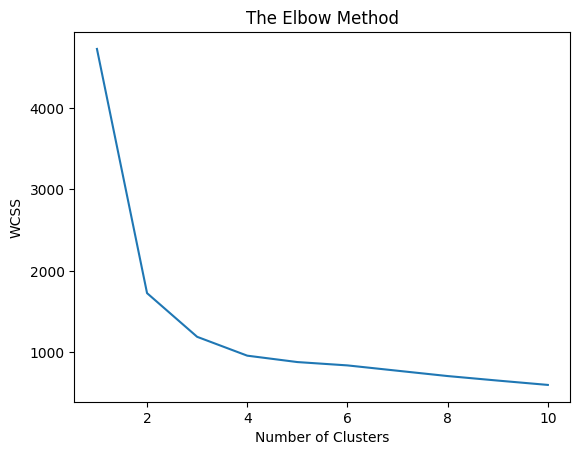

In [36]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', random_state=42)
    kmeans.fit(clusters)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=4, init= 'k-means++', max_iter=1000, random_state=42)
km_clusters = kmeans.fit_predict(clusters)
print(km_clusters)

[1 1 0 0 1 1 0 2 1 1 0 3 3 2 2 2 0 3 2 2 1 2 1 1 2 3 0 1 3 2 3 1 0 2 2 1 2
 2 1 2 2 2 0 3 0 1 1 0 0 2 1 3 0 0 0 0 2 1 0 1 1 1 1 1 2 2 3 2 3 0 3 2 2 0
 3 2 2 2 1 3 2 3 0 3 2 0 3 2 2 3 3 3 0 2 3 2 0 2 0 3 2 3 0 3 2 3 0 2 2 0 2
 3 1 1 3 0 3 0 1 3 2 3 0 0 1 2 3 2 0 1 3 3 3 2 3 3 2 1 2 3 1 3 3 1 0 0 2 0
 2 2 0 1 1 2 1 3 1 2 2 2 3 1 0 0 2 3 3 1 1 0 1 3 2 0 2 3 3 2 2 1 2 1 3 3 2
 0 1 0 0 3 3 1 3 2 0 3 2 2 1 0 3 0 0 0 1 1 0 2 0 1 0 0 3 1 0 2 2 0 1 0 2 1
 3 0 3 2 3 1 3 1 2 1 3 2 1 0 0 1 0 3 0 3 0 2 2 3 0 1 1 2 0 2 3 3 0 0 0 1 0
 1 2 0 0 2 1 2 3 3 3 2 0 1 2 3 1 3 0 2 2 1 0 0 3 1 1 0 0 3 0 1 1 3 1 0 0 0
 2 2 3 1 0 2 0 3 1 2 1 2 3 1 3 1 1 3 3 1 1 1 3 3 1 2 1 2 1 0 1 1 2 2 2 3 1
 0 0 2 2 3 3 2 0 3 1 2 0 2 2 1 2 3 1 2 2 0 0 0 1 2 0 3 3 3 1 1 2 0 3 0 2 0
 2 0 3 1 0 1 3 0 1 2 3 3 2 2 3 2 0 2 2 1 2 0 3 0 3 0 2 2 3 0 1 0 3 1 0 1 2
 3 1 3 0 2 3 0 3 0 0 3 0 1 1 1 1 0 2 3 2 1 2 2 1 1 3 2 3 0 1 3 0 1 0 0 1 0
 2 3 0 0 1 2 0 2 2 1 0 2 0 3 2 3 0 3 2 1 1 2 0 2 2 3 2 2 0 3 1 1 2 3 1 1 1
 3 0 3 1 0 1 0 1 3 3 0 2 

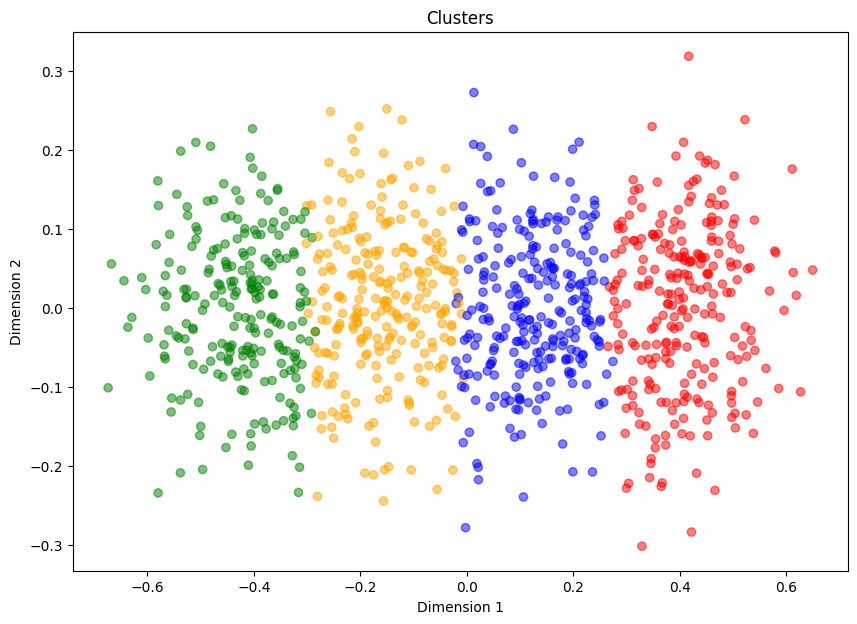

0.3258266316925586
1299.3808878977939
1.0432198684223812


In [38]:
def plot_clusters(data, clusters):
    plt.figure(figsize=(10, 7))
    col_map = {0: 'r', 1: 'g', 2: 'b', 3: 'orange', -1: 'gray'}  
    colors = [col_map.get(label, 'black') for label in clusters]  
    plt.scatter(data[:, 0], data[:, 1], c=colors, alpha=0.5)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Clusters')
    plt.show()
plot_clusters(clusters_2d, km_clusters)

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

print(silhouette_score(clusters, km_clusters))
print(calinski_harabasz_score(clusters, km_clusters))
print(davies_bouldin_score(clusters, km_clusters))

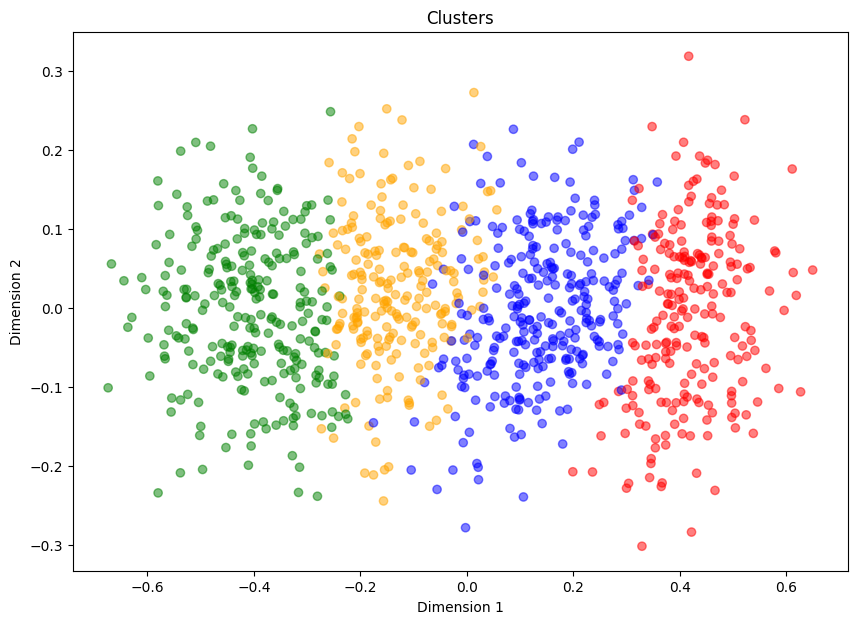

0.3008831896003681
1200.7277431274958
1.0706037045992143


In [39]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=4)
agg_pred = agg_model.fit_predict(clusters)
agg_pred
plot_clusters(clusters_2d, agg_pred)

print(silhouette_score(clusters, agg_pred))
print(calinski_harabasz_score(clusters, agg_pred))
print(davies_bouldin_score(clusters, agg_pred))

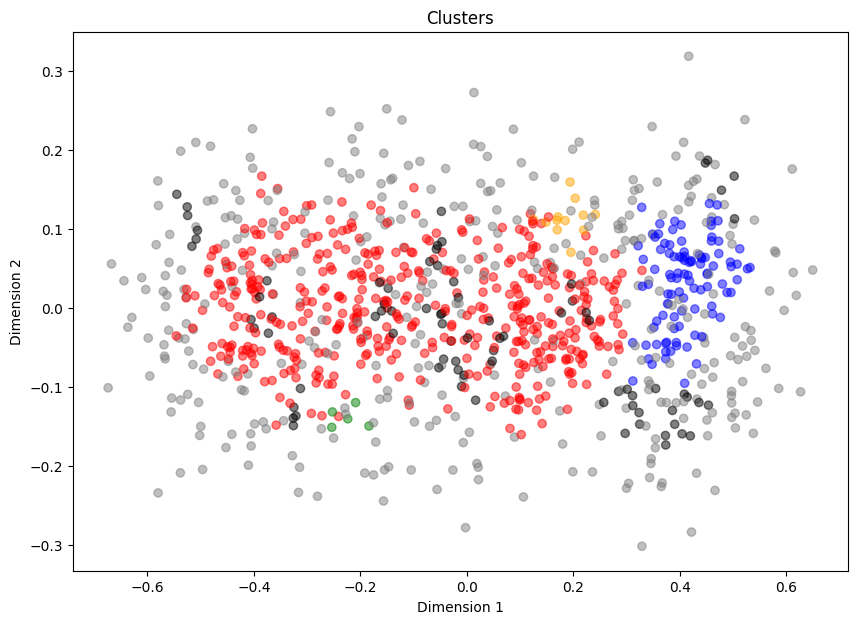

-0.44887472877780976
21.338200261578883
2.079452912794722


In [40]:
from sklearn.cluster import DBSCAN

db_model = DBSCAN(n_jobs=-1, min_samples=5, eps=.3)
db_pred = db_model.fit_predict(clusters)
plot_clusters(clusters_2d, db_pred)

print(silhouette_score(clusters, db_pred))
print(calinski_harabasz_score(clusters, db_pred))
print(davies_bouldin_score(clusters, db_pred))